<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#数据去重" data-toc-modified-id="数据去重-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>数据去重</a></span></li><li><span><a href="#对价格进行补值" data-toc-modified-id="对价格进行补值-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>对价格进行补值</a></span></li><li><span><a href="#逻辑值检验" data-toc-modified-id="逻辑值检验-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>逻辑值检验</a></span></li><li><span><a href="#连续数据的分布状态判断" data-toc-modified-id="连续数据的分布状态判断-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>连续数据的分布状态判断</a></span></li><li><span><a href="#以每个月为统计周期对满足不同价格和销量的销售记录分布图进行可视化" data-toc-modified-id="以每个月为统计周期对满足不同价格和销量的销售记录分布图进行可视化-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>以每个月为统计周期对满足不同价格和销量的销售记录分布图进行可视化</a></span><ul class="toc-item"><li><span><a href="#获取时间节点" data-toc-modified-id="获取时间节点-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>获取时间节点</a></span></li></ul></li><li><span><a href="#统计每个时间点的销售记录" data-toc-modified-id="统计每个时间点的销售记录-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>统计每个时间点的销售记录</a></span><ul class="toc-item"><li><span><a href="#对价格分组" data-toc-modified-id="对价格分组-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>对价格分组</a></span><ul class="toc-item"><li><span><a href="#计算组距" data-toc-modified-id="计算组距-6.1.1"><span class="toc-item-num">6.1.1&nbsp;&nbsp;</span>计算组距</a></span></li></ul></li><li><span><a href="#对销量分组" data-toc-modified-id="对销量分组-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>对销量分组</a></span><ul class="toc-item"><li><span><a href="#计算组距" data-toc-modified-id="计算组距-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>计算组距</a></span></li></ul></li></ul></li><li><span><a href="#行业大盘分析" data-toc-modified-id="行业大盘分析-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>行业大盘分析</a></span></li><li><span><a href="#销量最好的品牌" data-toc-modified-id="销量最好的品牌-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>销量最好的品牌</a></span></li><li><span><a href="#江小白位列前十，可谓后起之秀，这里评价一下江小白" data-toc-modified-id="江小白位列前十，可谓后起之秀，这里评价一下江小白-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>江小白位列前十，可谓后起之秀，这里评价一下江小白</a></span><ul class="toc-item"><li><span><a href="#江小白的销量情况" data-toc-modified-id="江小白的销量情况-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>江小白的销量情况</a></span></li><li><span><a href="#对江小白进行结构化分析" data-toc-modified-id="对江小白进行结构化分析-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>对江小白进行结构化分析</a></span></li></ul></li></ul></div>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['font.family'] = ['Arial Unicode MS', 'Microsoft Yahei', 'SimHei', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

In [7]:
data = pd.read_excel('酒类数据.xlsx',sheet_name='Sheet1')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8141 entries, 0 to 8140
Data columns (total 10 columns):
ID        8141 non-null int64
商品名称      8141 non-null object
价格        8139 non-null float64
近30天销量    8141 non-null int64
广告词       4726 non-null object
促销活动      4150 non-null object
评论数       7081 non-null float64
商品链接      8141 non-null object
日期        8141 non-null datetime64[ns]
品牌        8141 non-null object
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 636.1+ KB


**鉴于分析目的以及数据的实际业务意义，选择销量、价格、品牌作为主要分析特征**

**价格缺2个，其他的不缺值**

In [9]:
data.dtypes

ID                 int64
商品名称              object
价格               float64
近30天销量             int64
广告词               object
促销活动              object
评论数              float64
商品链接              object
日期        datetime64[ns]
品牌                object
dtype: object

### 数据去重

In [10]:
data = data.drop_duplicates()

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8133 entries, 0 to 8140
Data columns (total 10 columns):
ID        8133 non-null int64
商品名称      8133 non-null object
价格        8131 non-null float64
近30天销量    8133 non-null int64
广告词       4721 non-null object
促销活动      4147 non-null object
评论数       7073 non-null float64
商品链接      8133 non-null object
日期        8133 non-null datetime64[ns]
品牌        8133 non-null object
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 698.9+ KB


### 对价格进行补值

In [13]:
data['价格'].std()/data['价格'].mean()

1.6092238866840893

变异系数较大，属于强变异，选择就近补值或拉格朗日补值

In [14]:
#拉格朗日结合就近补值
from scipy.interpolate import lagrange
def nan_fill(col_nan,n):
    value_dict = {}
    col = col_nan.copy()
    for i in col.index:
        if (np.isnan(col[i])) and (i-n in col.index) and (i+n in col.index) \
        and col[i-n:i+n+1].isnull().value_counts()[True]==1:
            slice = col[i-n:i+n+1].copy()
            slice1 = slice.dropna()
            func = lagrange(list(slice1.index),slice1.values)
            value_dict[i] = func(i)
        else:
            continue
    col = col.fillna(value_dict) #将拉格朗日补值填充进去
    if col.isnull().value_counts()[False] != col.shape[0]: #不能用True的个数判断，因为可能已经没空值了
        col = col.fillna(method='bfill')
        if col.isnull().value_counts()[False] != col.shape[0]:
            col = col.fillna(method='ffill')
    return col.apply(lambda x:'%.2f' % x) #设定数据格式（这里需要根据实际修改）

In [15]:
lt_nan = data[data['价格'].isnull()].index.tolist()

In [16]:
res = nan_fill(data['价格'],3)

In [17]:
res[lt_nan]

174      114.92
1063    1340.00
Name: 价格, dtype: object

In [18]:
data.loc[174]

ID                                             522004673739
商品名称                            五粮液普五52度 500ml*2礼盒装猫超直采高度白酒
价格                                                      NaN
近30天销量                                                 1292
广告词                                          不参与天猫超市任何优惠券活动
促销活动                                            满2198元减200元
评论数                                                    1319
商品链接      https://chaoshi.detail.tmall.com/item.htm?id=5...
日期                                      2018-02-27 00:00:00
品牌                                                      五粮液
Name: 174, dtype: object

In [19]:
data.loc[1063]

ID                                             525501385105
商品名称                            牛栏山二锅头百年陈酿（三牛）52度400ml*6整箱装
价格                                                      NaN
近30天销量                                                 1434
广告词                                      箱内礼袋3支 正宗牛栏山 地道北京味
促销活动                                                    NaN
评论数                                                    1343
商品链接      https://chaoshi.detail.tmall.com/item.htm?id=5...
日期                                      2018-01-29 00:00:00
品牌                                                      牛栏山
Name: 1063, dtype: object

- 根据常识发现拉格朗日补值结果不合理，所以自行查找资料补值

In [20]:
data.loc[174,'价格'] = 2198

In [21]:
data.loc[1063,'价格'] = 515

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8133 entries, 0 to 8140
Data columns (total 10 columns):
ID        8133 non-null int64
商品名称      8133 non-null object
价格        8133 non-null float64
近30天销量    8133 non-null int64
广告词       4721 non-null object
促销活动      4147 non-null object
评论数       7073 non-null float64
商品链接      8133 non-null object
日期        8133 non-null datetime64[ns]
品牌        8133 non-null object
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 1018.9+ KB


### 逻辑值检验

In [23]:
data['价格'].max(),data['价格'].min()

(11512.8, 0.0)

In [24]:
data.loc[data['价格']==0,'价格'] = round((data['价格'].median()),1) #把价格为0元的补成中位数

In [25]:
data['价格'].min()

4.5

### 连续数据的分布状态判断

In [26]:
from scipy import stats

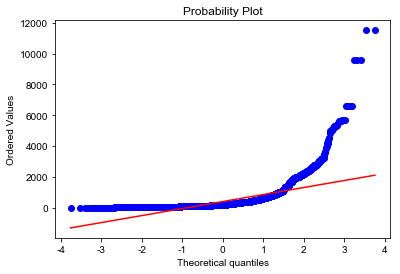

In [28]:
stats.probplot(data['价格'],(0,1),dist='norm',plot=plt)
plt.show()

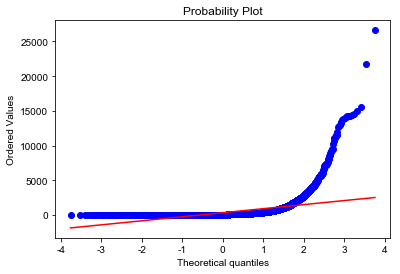

In [30]:
stats.probplot(data['近30天销量'],(0,1),dist='norm',plot=plt)
plt.show()

(-10, 10)

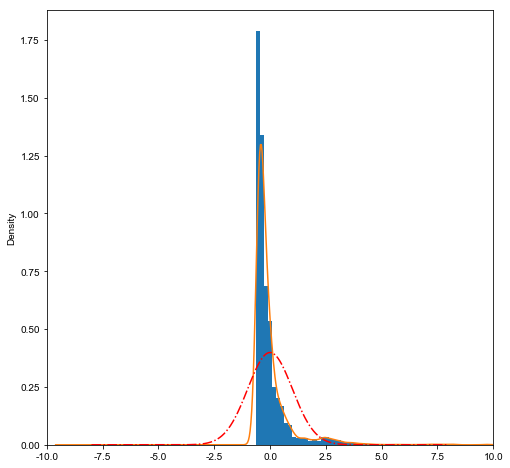

In [31]:
pp,aa = plt.subplots(1,1,figsize=(8,8))
price =(data['价格']-data['价格'].mean())/data['价格'].std() #数据标准化
price.hist(ax=aa,bins=100,density=True)
price.plot(ax=aa,kind='kde')
X=np.linspace(-8,8,1000)
f=lambda x:(1/((2*np.pi)**0.5))*np.exp(-0.5*x**2)  #绘制一个标准正态分布，用于比较
aa.plot(X,f(X),'r-.')
aa.set_xlim(-10,10)

**结论：价格和销量并不是标准正态分布**

### 以每个月为统计周期对满足不同价格和销量的销售记录分布图进行可视化

#### 获取时间节点

In [32]:
datelist = list(set(data['日期'].astype(str).values))
datelist

['2017-08-15',
 '2017-07-06',
 '2017-11-03',
 '2017-05-24',
 '2018-01-29',
 '2017-12-01',
 '2018-02-27',
 '2017-12-26',
 '2017-09-30']

In [33]:
datelist.sort()
datelist

['2017-05-24',
 '2017-07-06',
 '2017-08-15',
 '2017-09-30',
 '2017-11-03',
 '2017-12-01',
 '2017-12-26',
 '2018-01-29',
 '2018-02-27']

### 统计每个时间点的销售记录

In [54]:
records = [len(data.loc[data['日期']== t,:]) for t in datelist]
records

[761, 799, 881, 914, 934, 922, 1003, 1039, 880]

**挑选12月1号时间点分析，销售了922件**

#### 对价格分组

In [55]:
price_1201 = data.loc[data['日期']==datelist[5],'价格']

In [56]:
price_1201.describe()

count     922.000000
mean      398.178308
std       590.739319
min        12.600000
25%       105.900000
50%       199.000000
75%       408.750000
max      6588.000000
Name: 价格, dtype: float64

##### 计算组距

In [37]:
s = price_1201.values
len(set(s))

350

350个不同的数据,标准差为590，平均值为398，590/398=1.48，数据强变异，需要分比较多的组

In [38]:
interval = (price_1201.max() - price_1201.min())/60
interval

109.58999999999999

In [39]:
#选择分为60组

In [40]:
group = [np.floor(price_1201.min())+110*i for i in range(0,61)]

In [41]:
res = pd.cut(price_1201.values,group,right=False)
res

[[12.0, 122.0), [12.0, 122.0), [232.0, 342.0), [12.0, 122.0), [12.0, 122.0), ..., [232.0, 342.0), [12.0, 122.0), [12.0, 122.0), [12.0, 122.0), [2212.0, 2322.0)]
Length: 922
Categories (60, interval[float64]): [[12.0, 122.0) < [122.0, 232.0) < [232.0, 342.0) < [342.0, 452.0) ... [6172.0, 6282.0) < [6282.0, 6392.0) < [6392.0, 6502.0) < [6502.0, 6612.0)]

#### 对销量分组

In [42]:
sales_1201 = data.loc[data['日期']==datelist[5],'近30天销量']

In [43]:
sales_1201.describe()

count      922.000000
mean       372.613883
std       1143.293930
min          0.000000
25%         18.000000
50%         70.000000
75%        234.750000
max      13930.000000
Name: 近30天销量, dtype: float64

In [44]:
sales_1201.describe()['std']/sales_1201.describe()['mean']  #变异系数为3.06

3.0683073888934342

##### 计算组距

In [46]:
# 分为15组

In [47]:
(sales_1201.max()-sales_1201.min())/15

928.6666666666666

In [48]:
group1 = [sales_1201.min()+929*i for i in range(0,16)]
group1

[0,
 929,
 1858,
 2787,
 3716,
 4645,
 5574,
 6503,
 7432,
 8361,
 9290,
 10219,
 11148,
 12077,
 13006,
 13935]

In [49]:
res1 = pd.cut(sales_1201.values,group1,right=False)
res1

[[0, 929), [0, 929), [5574, 6503), [6503, 7432), [0, 929), ..., [0, 929), [0, 929), [0, 929), [1858, 2787), [0, 929)]
Length: 922
Categories (15, interval[int64]): [[0, 929) < [929, 1858) < [1858, 2787) < [2787, 3716) ... [10219, 11148) < [11148, 12077) < [12077, 13006) < [13006, 13935)]

In [50]:
pd.value_counts(res) #价格分组结果

[12.0, 122.0)       291
[122.0, 232.0)      219
[232.0, 342.0)      108
[342.0, 452.0)       91
[452.0, 562.0)       47
[562.0, 672.0)       34
[672.0, 782.0)       27
[782.0, 892.0)       17
[892.0, 1002.0)      16
[1332.0, 1442.0)     10
[1002.0, 1112.0)      7
[1992.0, 2102.0)      6
[2102.0, 2212.0)      6
[1882.0, 1992.0)      6
[1112.0, 1222.0)      5
[1552.0, 1662.0)      4
[2322.0, 2432.0)      4
[1772.0, 1882.0)      3
[2432.0, 2542.0)      3
[2652.0, 2762.0)      3
[1662.0, 1772.0)      2
[3092.0, 3202.0)      2
[1222.0, 1332.0)      2
[1442.0, 1552.0)      1
[2212.0, 2322.0)      1
[2762.0, 2872.0)      1
[2982.0, 3092.0)      1
[6502.0, 6612.0)      1
[3202.0, 3312.0)      1
[4082.0, 4192.0)      1
[5292.0, 5402.0)      1
[4962.0, 5072.0)      1
[4852.0, 4962.0)      0
[6282.0, 6392.0)      0
[6172.0, 6282.0)      0
[6062.0, 6172.0)      0
[5952.0, 6062.0)      0
[5842.0, 5952.0)      0
[5732.0, 5842.0)      0
[5622.0, 5732.0)      0
[5512.0, 5622.0)      0
[5402.0, 5512.0)

In [51]:
pd.value_counts(res1) #销量分组结果

[0, 929)          846
[929, 1858)        38
[2787, 3716)       10
[1858, 2787)        9
[3716, 4645)        7
[6503, 7432)        3
[8361, 9290)        2
[5574, 6503)        2
[13006, 13935)      1
[12077, 13006)      1
[10219, 11148)      1
[9290, 10219)       1
[4645, 5574)        1
[11148, 12077)      0
[7432, 8361)        0
dtype: int64

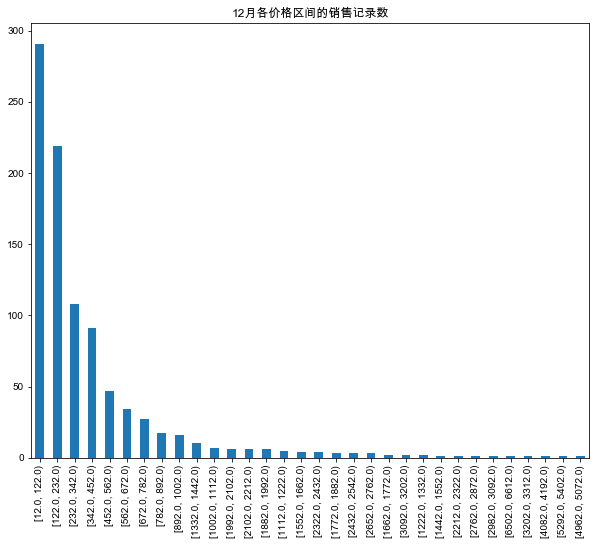

In [67]:
pd.value_counts(res).head(32).plot(kind='bar',figsize=(10,8))
plt.title('12月各价格区间的销售记录数')
plt.show()

Text(0.5, 1.0, '12月各销量区间的销售记录数')

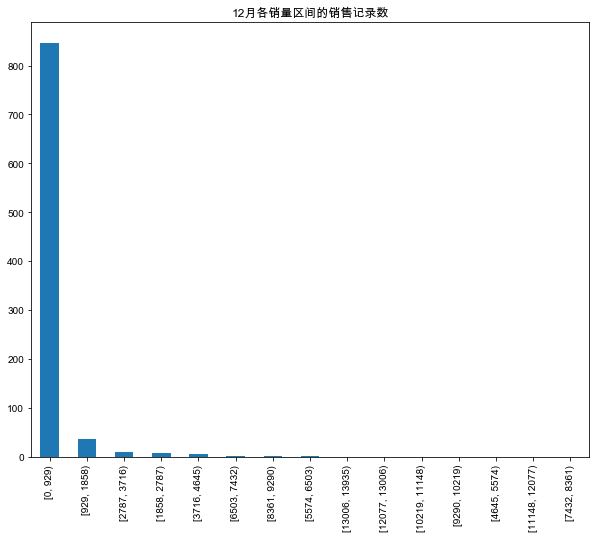

In [66]:
pd.value_counts(res1).plot(kind='bar',figsize=(10,8))
plt.title('12月各销量区间的销售记录数')

### 行业大盘分析

In [61]:
list(data.groupby(['品牌']))[3][0] #[('品牌1',dataframe1),('品牌2',dataframe2)]  #groupby用于离散数据（废话）

'伊力特'

In [62]:
data.groupby(['品牌'])['近30天销量'].sum()

品牌
Union     20058
习酒        40085
五粮液      489881
伊力特        2244
八八坑        1143
剑南春       82432
劲牌         2726
劲酒       104069
双沟         6125
双沟君坊       2301
双沟醴泉       1348
古井贡酒      93954
古越龙山       2894
喜碧曼           8
四特        14287
国台         1056
天佑德        8972
安达情        3079
小糊涂仙      19448
年份原浆       3521
景芝          389
杜康          415
樱花汇         285
欧欣          897
水井坊        8288
江小白      150486
汾酒        93788
泸州老窖     165793
洋河       283055
牛栏山      386274
珍酒         1268
白云边       28325
白水杜康       1338
稻花香        5862
红星       254713
致中和       19180
舒可曼        1248
茅台       227210
董酒         4826
衡水老白干     25694
西凤        27863
贵州国台         79
赖茅         1257
迎驾贡酒       5225
郎酒        44790
酒鬼酒         428
金六福        1783
金门        14023
飞天不老      37670
黄金酒         327
Name: 近30天销量, dtype: int64

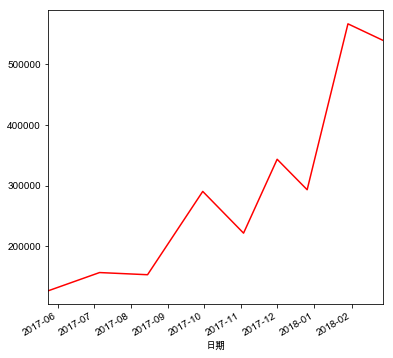

日期
2017-05-24    126626
2017-07-06    156841
2017-08-15    153258
2017-09-30    290567
2017-11-03    221814
2017-12-01    343550
2017-12-26    293321
2018-01-29    566754
2018-02-27    539679
Name: 近30天销量, dtype: int64

In [63]:
f,a = plt.subplots(1,1,figsize=(6,6))
data.groupby(['日期'])['近30天销量'].sum().plot(kind='line',ax=a,c='r')
plt.show()

data.groupby(['日期'])['近30天销量'].sum()

4.0 580.0
580.0 1157.0
1157.0 1733.0
1733.0 2310.0
2310.0 2886.0
2886.0 3462.0
3462.0 4039.0
4039.0 4615.0
4615.0 5192.0
5192.0 5768.0
5768.0 6345.0
6345.0 6921.0
6921.0 7497.0
7497.0 8074.0
8074.0 8650.0
8650.0 9227.0
9227.0 9803.0
9803.0 10379.0
10379.0 10956.0
10956.0 11532.0


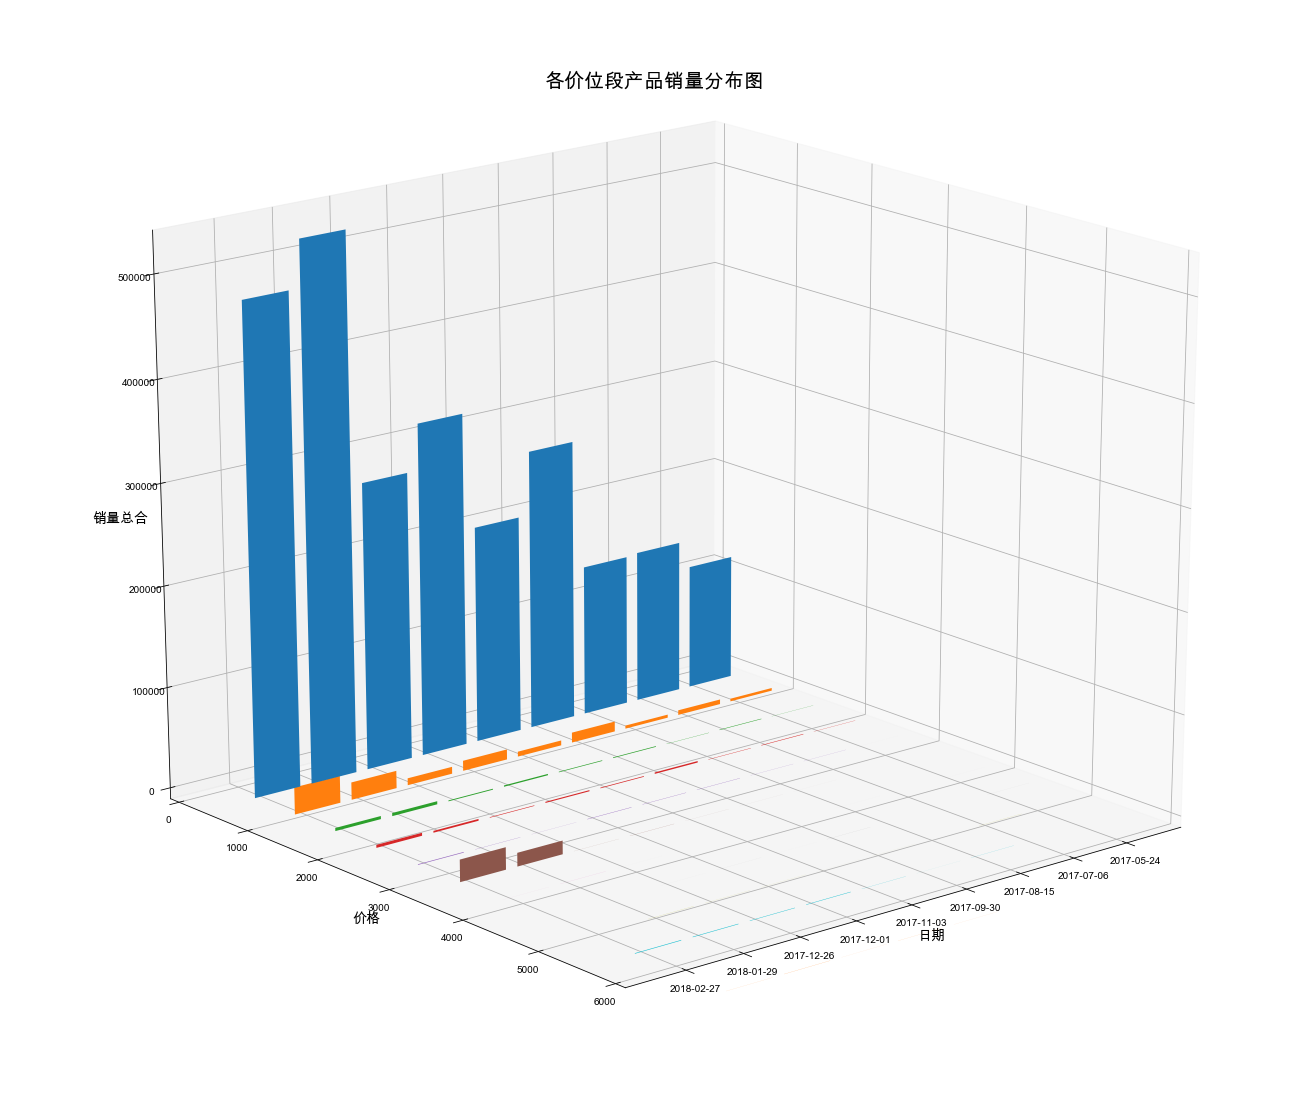

In [64]:
fig=plt.figure(figsize=(18,15))
ax=Axes3D(fig)
price_int1=(data['价格'].max()-data['价格'].min())/20
data_price_x1=np.ceil([(data['价格'].min()-1)+j*(price_int1+1) for j in range(0,21)]).tolist()
for prz in range(len(data_price_x1)-1):
    data_ind=data.loc[(data['价格']>data_price_x1[prz])&(data['价格']<=data_price_x1[prz+1]),:]
    ser_data=data_ind.groupby('日期')['近30天销量'].sum()
    X_val,Sal_val=list(ser_data.index.astype(str)),ser_data.values
    ax.bar( X_val,Sal_val,data_price_x1[prz+1],zdir='y')
    print(data_price_x1[prz],data_price_x1[prz+1])
plt.xlabel('日期',fontsize=14)
plt.ylabel('价格',fontsize=14)
ax.set_zlabel('销量总合',fontsize=14)
ax.set_title('各价位段产品销量分布图',fontsize=20)
plt.ylim([0,6000])#限制价格范围，局部观察每个条形图系列
ax.view_init(elev=20,azim=50)

观察上面的线图和三维直方图可得下面的结论：
1. 全价位段行业大盘走势整体呈上升趋势。从第一个统计周期2017-05-24起开始缓慢增长至2017-08-15。然后进入快速增长阶段，然而在2017-11和2018-01两个统计周期分别下降到局部谷底值，

    随后急剧增长至峰值。

2. 各价位段行业大盘销量变化趋势十分雷同于整体全价位段行业大盘销量变化趋势
3. 产品销量主要主要集中于4-580这个价位段。

### 销量最好的品牌

In [101]:
brand =(data.groupby('品牌')['近30天销量'].sum()).sort_values(ascending=False)
brand.head(10)

品牌
五粮液     489881
牛栏山     386274
洋河      283055
红星      254713
茅台      227210
泸州老窖    165793
江小白     150486
劲酒      104069
古井贡酒     93954
汾酒       93788
Name: 近30天销量, dtype: int64

In [103]:
brand_lt = brand.head(10).index.tolist()

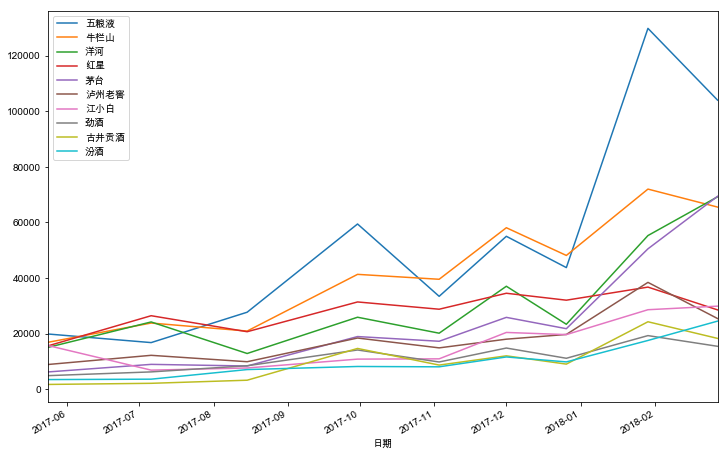

In [106]:
for p in brand_lt:
    data[data['品牌']==p].groupby('日期')['近30天销量'].sum().plot(kind='line',label=p,figsize=(12,8))
    plt.legend(loc='best')

**销量最好的前10名中，各品牌销量的变化基本趋于一致，且整体均呈上升趋势，五粮液的销量在18年1月陡升并遥遥领先于其他品牌**

### 江小白位列前十，可谓后起之秀，这里评价一下江小白

In [70]:
jxb = data[data['品牌']=="江小白"]
jxb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 0 to 8101
Data columns (total 10 columns):
ID        156 non-null int64
商品名称      156 non-null object
价格        156 non-null float64
近30天销量    156 non-null int64
广告词       137 non-null object
促销活动      100 non-null object
评论数       133 non-null float64
商品链接      156 non-null object
日期        156 non-null datetime64[ns]
品牌        156 non-null object
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 13.4+ KB


#### 江小白的销量情况

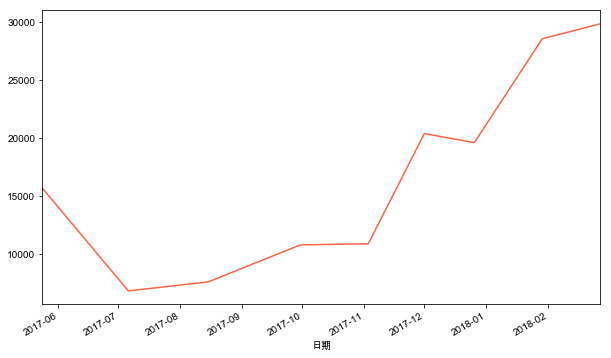

In [74]:
df = jxb.groupby("日期")['近30天销量'].sum()
df.plot(figsize=(10,6),c='tomato')

**从第一个统计节点开始直至第二个统计节点，江小白销量急速下降，随后进入缓慢增长期直至统计节点2017-11.此后进入急剧增长期直至统计节点2018-02-27，达到峰值。**

#### 对江小白进行结构化分析

In [79]:
df1= jxb.groupby(['ID'])['近30天销量'].sum()
df1.sort_values(ascending=False)

ID
536909908299    59216
536872453030    18012
536909880348    15097
536871917851    14422
554149816345    12175
542582083693     5937
536834494769     4191
536909884345     3750
542569577352     3332
542543760623     3135
554298843374     2859
542571033086     1532
537013830676     1525
539368049069     1109
557978064100      809
536834250302      736
558181279628      562
542584358321      541
562434433873      482
557752048412      423
557151324937      294
543549476618      137
542550068847      115
559886811509       95
Name: 近30天销量, dtype: int64

**江小白销量的前5分别是ID：536909908299、536872453030、536909880348、536871917851、554149816345**

In [96]:
jxb[jxb['ID']==536909908299][['商品名称','价格']]

,商品名称,价格
5,江小白白酒清香型40度Se.100ml*6瓶整箱装高粱酒,108.0
892,江小白白酒清香型40度Se.100ml*6瓶整箱装高粱酒,99.0
1936,江小白白酒清香型40度Se.100ml*6瓶整箱装高粱酒,95.0
2942,江小白白酒清香型40度Se.100ml*6瓶整箱装高粱酒,99.0
3874,江小白白酒清香型40度Se.100ml*6瓶整箱装高粱酒,89.0
4808,【天猫超市】江小白白酒清香型40度Se.100ml*6瓶整箱装高粱酒,99.0
5726,【天猫超市】江小白白酒清香型45度100ml*6迷你小酒版小瓶白酒,99.0
6613,【天猫超市】江小白白酒清香型45度100ml*6迷你小酒版小瓶白酒,99.0
7411,【天猫超市】江小白白酒清香型45度100ml*6小酒版小瓶白酒整箱,95.0


**可见江小白销量最好的是“江小白白酒清香型40度Se.100ml*6瓶整箱装高粱酒”这款产品，价格亲民，99元**